In [1]:
#Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing the necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import sklearn.metrics as metrics
import itertools
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [3]:
#Importing the news datasets
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake News Project/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fake News Project/True.csv")

In [4]:
#checking shape 
fake.shape

(23481, 4)

In [5]:
#checking shape 
true.shape

(21417, 4)

We observe that fake news has 23481 rows and 4 columns while true news has 21417 rows and 4 columns. 

In [6]:
#checking the dataset
fake.sample(4)

,title,text,subject,date
3512,Pope Francis BLASTS Conservatives For ‘Sin’ O...,"Pope Francis is once again speaking the truth,...",News,"December 7, 2016"
5597,Hillary Used Campaign Event With Obama To PER...,While appearing for the first time on the camp...,News,"July 5, 2016"
1803,GOP Rep Gets RIPPED APART After Saying Sean S...,"On Wednesday, GOP Rep. Kevin Cramer opened his...",News,"April 13, 2017"
16491,RECKLESS: CLINTON PRESIDENCY Could Mean U.S. M...,Hillary Clinton always putting a radical ideol...,Government News,"Jul 25, 2016"


In [7]:
#checking the dataset
true.sample(4)

,title,text,subject,date
6275,Senate Democrats ask Trump attorney general pi...,WASHINGTON (Reuters) - Nine Democratic senator...,politicsNews,"January 17, 2017"
5268,First planned North Korea-U.S. contact in Trum...,SEOUL (Reuters) - Plans for the first contact ...,politicsNews,"February 25, 2017"
3782,Trump on Twitter (May 15) - National Peace Off...,The following statements were posted to the ve...,politicsNews,"May 16, 2017"
15476,Estonia arrests suspected Russian FSB agent,TALLINN (Reuters) - Estonia has detained a man...,worldnews,"November 7, 2017"


**Data cleaning and preparation**

In [8]:
# Add flag to track fake and real. Fake is denoted as '0' and true is denoted as '1'.
fake['label'] = '0'
true['label'] = '1'

In [9]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [10]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
# Check the data
data.head()

,title,text,subject,date,label
0,More than 20 Islamic State militants killed in...,WASHINGTON/AMMAN (Reuters) - A Pentagon-backed...,worldnews,"December 14, 2017",1
1,IS PUERTO RICO THE NEXT DETROIT?,This entire situation with Puerto Rico reminds...,Government News,"Jun 29, 2015",0
2,TRUMP TWEET STORM On Obamacare Sets Up Battle ...,Remember when Pelosi said it s AFFORDABLE :,politics,"Jan 3, 2017",0
3,WATCH: Racist Trump Supporter Who Called Mich...,The Buffalo School Board refuses to tolerate r...,News,"December 29, 2016",0
4,House Armed Services chairman: Trump budget no...,WASHINGTON (Reuters) - The Republican chairman...,politicsNews,"March 16, 2017",1


In [12]:
# Removing the date as it is not needed
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,label
0,More than 20 Islamic State militants killed in...,WASHINGTON/AMMAN (Reuters) - A Pentagon-backed...,worldnews,1
1,IS PUERTO RICO THE NEXT DETROIT?,This entire situation with Puerto Rico reminds...,Government News,0
2,TRUMP TWEET STORM On Obamacare Sets Up Battle ...,Remember when Pelosi said it s AFFORDABLE :,politics,0
3,WATCH: Racist Trump Supporter Who Called Mich...,The Buffalo School Board refuses to tolerate r...,News,0
4,House Armed Services chairman: Trump budget no...,WASHINGTON (Reuters) - The Republican chairman...,politicsNews,1


In [13]:
# Removing the title as we will only use the text
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,label
0,WASHINGTON/AMMAN (Reuters) - A Pentagon-backed...,worldnews,1
1,This entire situation with Puerto Rico reminds...,Government News,0
2,Remember when Pelosi said it s AFFORDABLE :,politics,0
3,The Buffalo School Board refuses to tolerate r...,News,0
4,WASHINGTON (Reuters) - The Republican chairman...,politicsNews,1


In [14]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,label
0,washington/amman (reuters) - a pentagon-backed...,worldnews,1
1,this entire situation with puerto rico reminds...,Government News,0
2,remember when pelosi said it s affordable :,politics,0
3,the buffalo school board refuses to tolerate r...,News,0
4,washington (reuters) - the republican chairman...,politicsNews,1


In [15]:
# Remove punctuation
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [16]:
# Check the data after punctuation removal
data.head()

,text,subject,label
0,washingtonamman reuters a pentagonbacked rebe...,worldnews,1
1,this entire situation with puerto rico reminds...,Government News,0
2,remember when pelosi said it s affordable,politics,0
3,the buffalo school board refuses to tolerate r...,News,0
4,washington reuters the republican chairman of...,politicsNews,1


In [17]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
data.head()

,text,subject,label
0,washingtonamman reuters pentagonbacked rebel g...,worldnews,1
1,entire situation puerto rico reminds bailouts ...,Government News,0
2,remember pelosi said affordable,politics,0
3,buffalo school board refuses tolerate racism o...,News,0
4,washington reuters republican chairman house a...,politicsNews,1


**Data visualization**

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


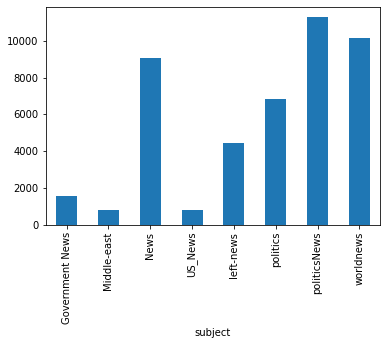

In [19]:
# How many articles do we find per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

label
0    23481
1    21417
Name: text, dtype: int64


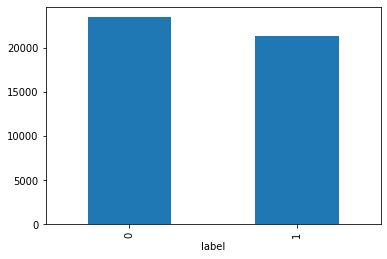

In [20]:
# How many fake and real articles?
print(data.groupby(['label'])['text'].count())
data.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

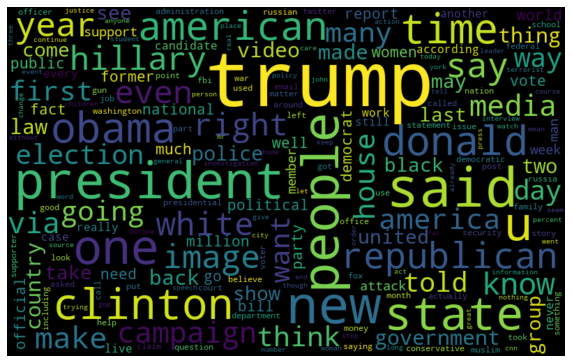

In [21]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["label"] == "0"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The fake news word cloud shows that words like trump, clinton, people, president, republican, etc are the most used. 

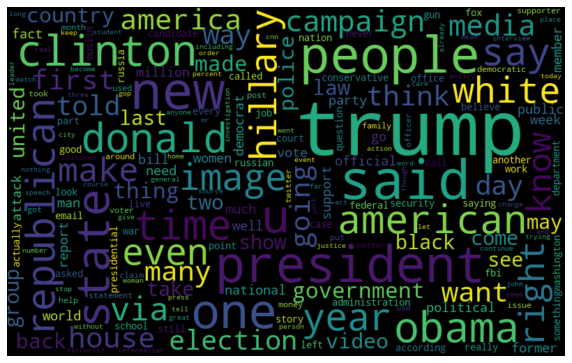

In [22]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["label"] == "1"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The true news word cloud shows that words like trump, people, year, new, white, time etc. are the most used. 

In [23]:
# Most frequent words counter 
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

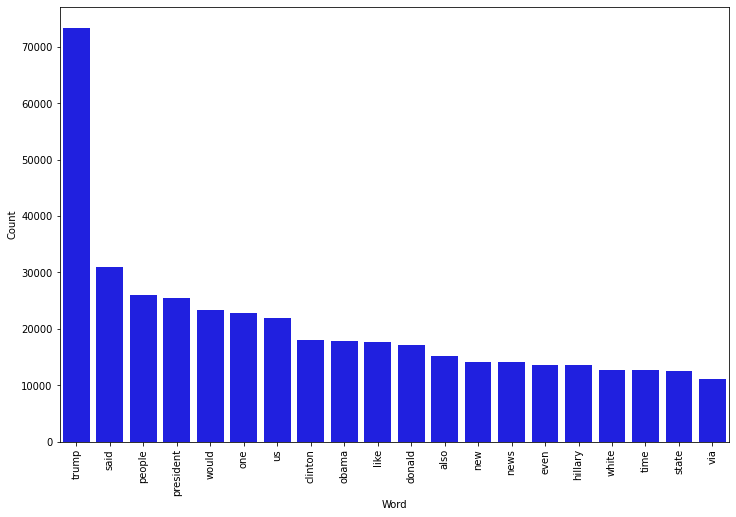

In [24]:
# Most frequent words in fake news
counter(data[data["label"] == "0"], "text", 20)

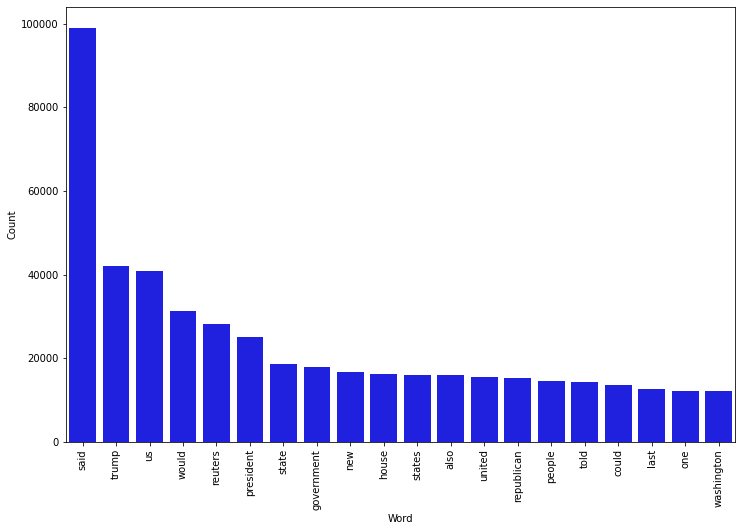

In [25]:
# Most frequent words in real news
counter(data[data["label"] == "1"], "text", 20)

**Data Modeling**

In [26]:
# Function to plot the confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Preparing the data for testing with Train, Test, Split**

In [27]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.label, test_size=0.2, random_state=42)

**Naive Bayes**

In [28]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.28%


Confusion matrix, without normalization


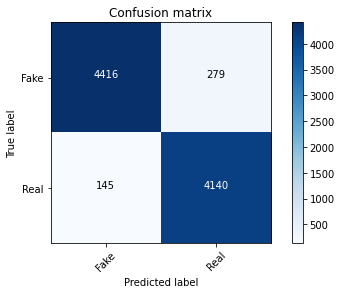

In [29]:
import sklearn.metrics as metrics
import itertools

cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Logistic Regression**

In [30]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.94%


Confusion matrix, without normalization


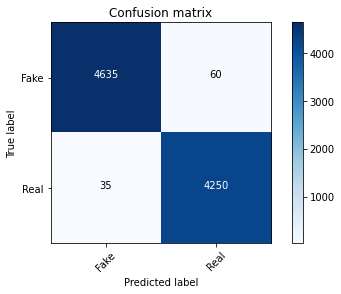

In [31]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Decision Tree**

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.76%


Confusion matrix, without normalization


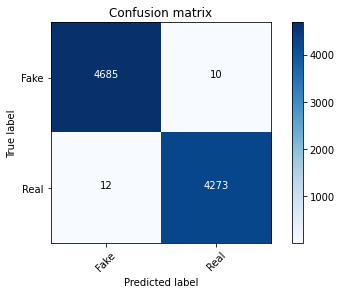

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.01%


Confusion matrix, without normalization


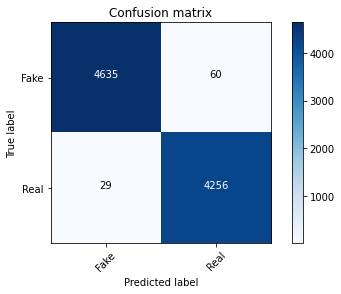

In [35]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**SVM Classifier**

In [36]:
from sklearn import svm

#Create a SVM Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.6%


Confusion matrix, without normalization


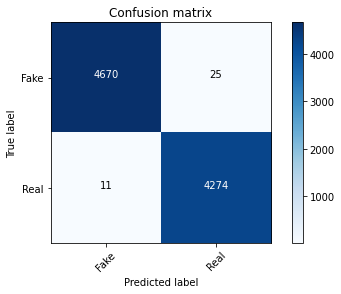

In [37]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

**Comparing Different Models**

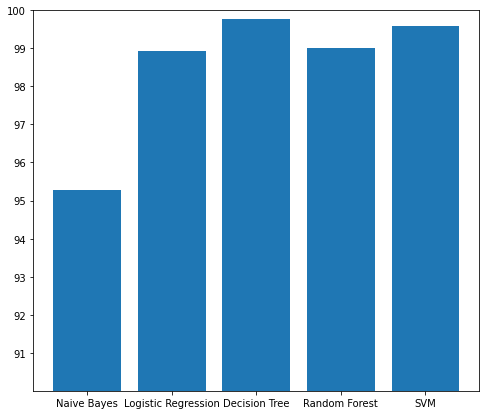

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.show()

**Conclusion:**

We have tested our data on 5 different models, viz., Naive Bayes, Logistic Regression, Decision Tree, Random Forest and SVM Classifier. We can see that all of them offers an accuracy score more than 95%, however, SVM or Support Vector Classifier offers utmost accuracy which is of 99.6%.